# Procesamiento de imágenes · Tarea 2

En esta tarea seguiremos trabajando con la imagen del avión. Usaremos lo aprendido en clases para segmentar el avión, espejarlo y pegarlo sobre la imagen original en una nueva ubicación. Llegaremos a esto:

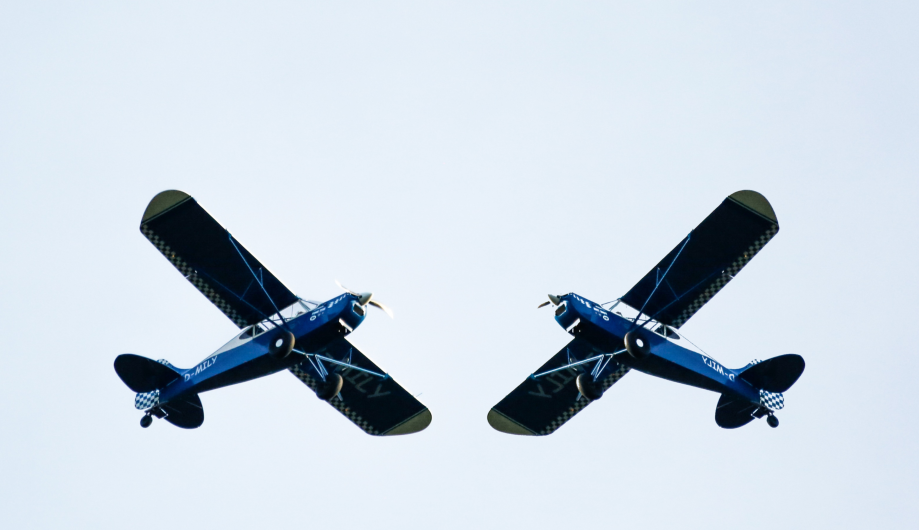

El programa está incompleto, por lo que deberás escribir tu propio código en las celdas que lo soliciten. Ejecuta las celdas en orden hasta llegar a una que debas rellenar. Una vez hayas escrito tu código, continúa ejecutando las celdas y asegúrate que no hayan alertas al correr los chequeos.

### Importante
* Lee atentamente las instrucciones y todo el código.
* Ejecuta las celdas en orden.
* Escribe tu código en las celdas que lo soliciten.
* Usa los nombres de variables que te pidan.
* Confirma que tu código esté correcto corriendo las celdas que dicen "Chequeo".
* Si el chequeo alerta que hay alguna variable incorrecta, vuelve atrás y arréglala. No hay penalización por esto.

## Configuración inicial

##### Importamos librerías

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

##### Aumentamos el tamaño de las imágenes

In [2]:
plt.rcParams['figure.dpi'] = 200

## Carga y visualización de la imagen

##### Cargamos la foto en escala de grises y a color

In [3]:
img_path = 'plane.jpg'
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread(img_path, cv2.IMREAD_COLOR)[:, :, ::-1]

##### Mostramos la foto en escala de grises junto con información sobre ella 

La clase de la imagen es ndarray
La clase de cada pixel es uint8


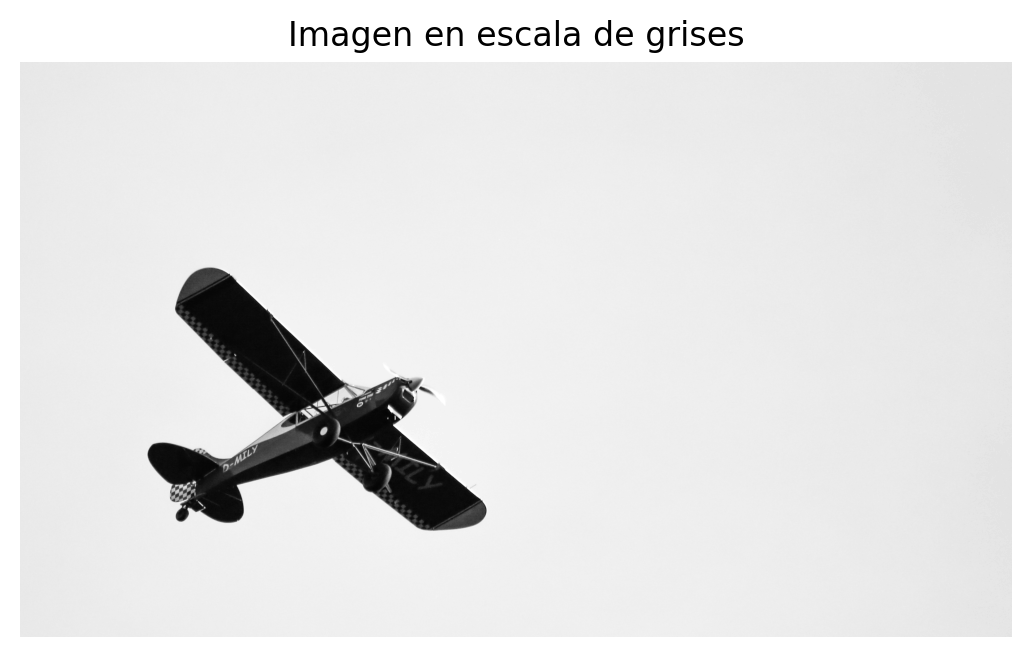

In [4]:
print(f'La clase de la imagen es {type(img_gray).__name__}')
print(f'La clase de cada pixel es {img_gray.dtype}')

plt.imshow(img_gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off');

## Histograma

Conocimos el histograma de esta imagen en la tarea anterior. Lo volvemos a generar para recordarlo.

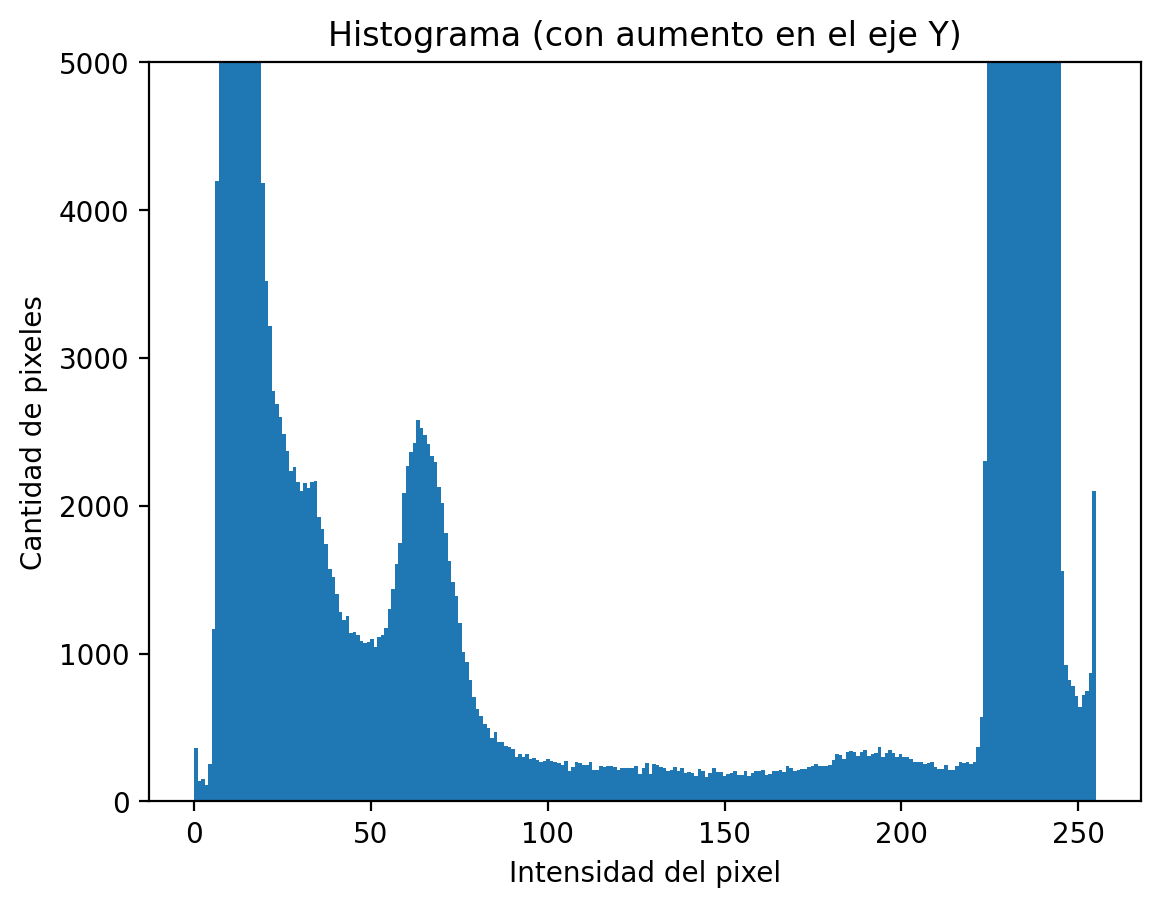

In [5]:
plt.hist(img_gray.ravel(), 256)
plt.ylim(0, 5000)
plt.title('Histograma (con aumento en el eje Y)')
plt.xlabel('Intensidad del pixel')
plt.ylabel('Cantidad de pixeles');

## Elección del umbral

Hay varios umbrales que sirven para segmentar el avión. En esta tarea fijaremos el ```threshold```en 150.

In [6]:
threshold = 150

## Segmentación

Al igual que en la tarea pasada, usamos la función ```threshold``` de OpenCV para obtener una imagen binaria con el avion en blanco y el fondo en negro.

Las dimensiones de la imagen son (1825, 3147)
La clase de la imagen es ndarray
La clase de cada pixel es uint8


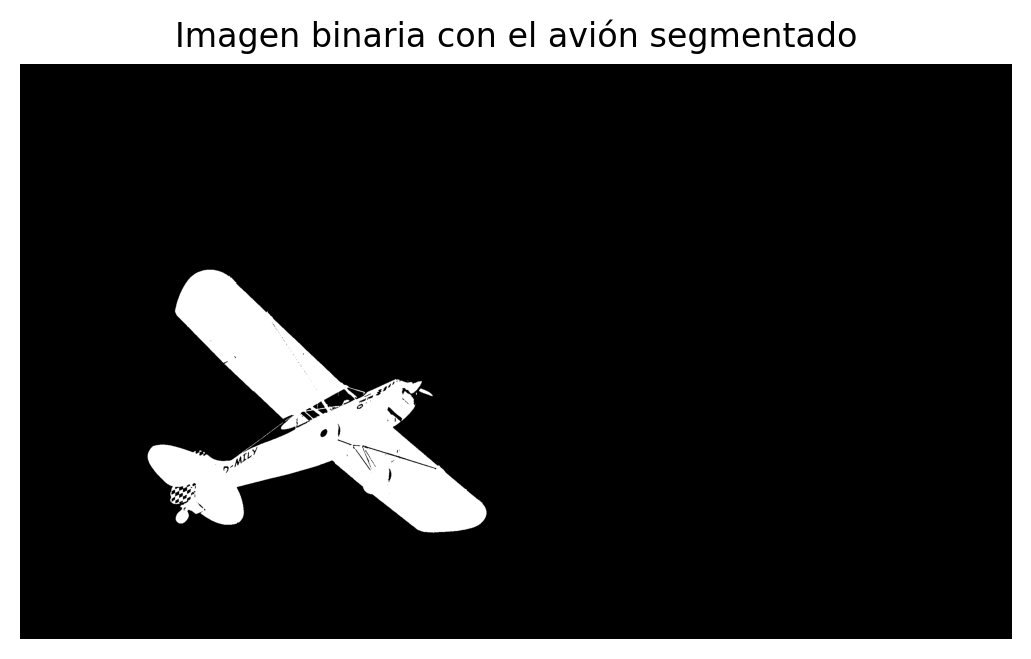

In [7]:
img_bin = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY_INV)[1]
print(f'Las dimensiones de la imagen son {img_bin.shape}')
print(f'La clase de la imagen es {type(img_bin).__name__}')
print(f'La clase de cada pixel es {img_bin.dtype}')

plt.imshow(img_bin, cmap='gray')
plt.title('Imagen binaria con el avión segmentado')
plt.axis('off');

## Extracción del avión

Ahora comenzamos con cosas nuevas. Podemos usar la información que tenemos para extraer el avión de la imagen, remplazando el fondo por el color negro. Esto nos permitirá colocar el avión sobre otra imagen más adelante. 

En clases vimos que la extracción se puede lograr mediante una multiplicación entre la imagen original y una imagen binaria compuesta por ceros y unos. Esto se muestra a continuación:

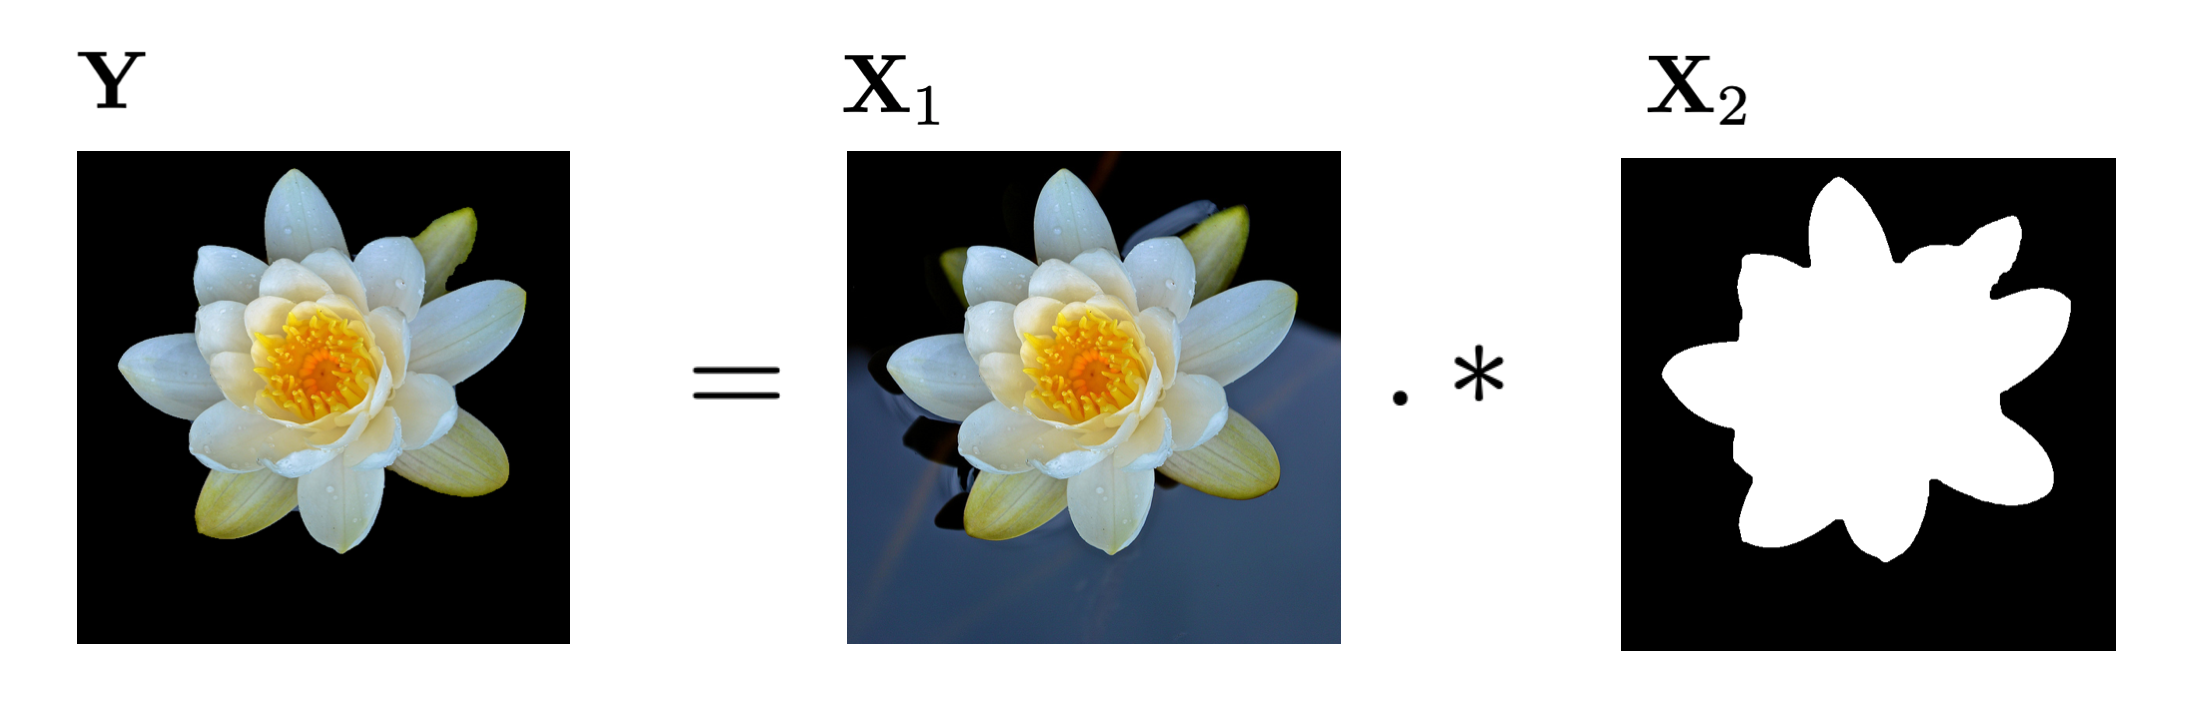

Podríamos usar ese método para extraer el avión, pero tenemos dos inconvenientes. Primero, nuestra imagen binaria (o máscara) contiene los valores 0 y 255 en vez de 0 y 1. Segundo, los tamaños de ambas imágenes no coinciden, ya que una es a color y otra en escala de grises. Estos inconvenientes podrían ser solucionados en unas líneas de código, pero resulta más conveniente usar una función de OpenCV.

**Usa la función ```bitwise_and``` de OpenCV para crear la variable ```ìmg_color_masked``` usando la máscara ```img_bin``` sobre ```img_color```.** [Aquí](https://docs.opencv.org/4.5.2/d2/de8/group__core__array.html#ga60b4d04b251ba5eb1392c34425497e14) puedes encontrar la documentación de la función y [aquí](https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html) un ejemplo que la utiliza.

Las dimensiones de la imagen son (1825, 3147, 3)
La clase de la imagen es ndarray
La clase de cada pixel es uint8


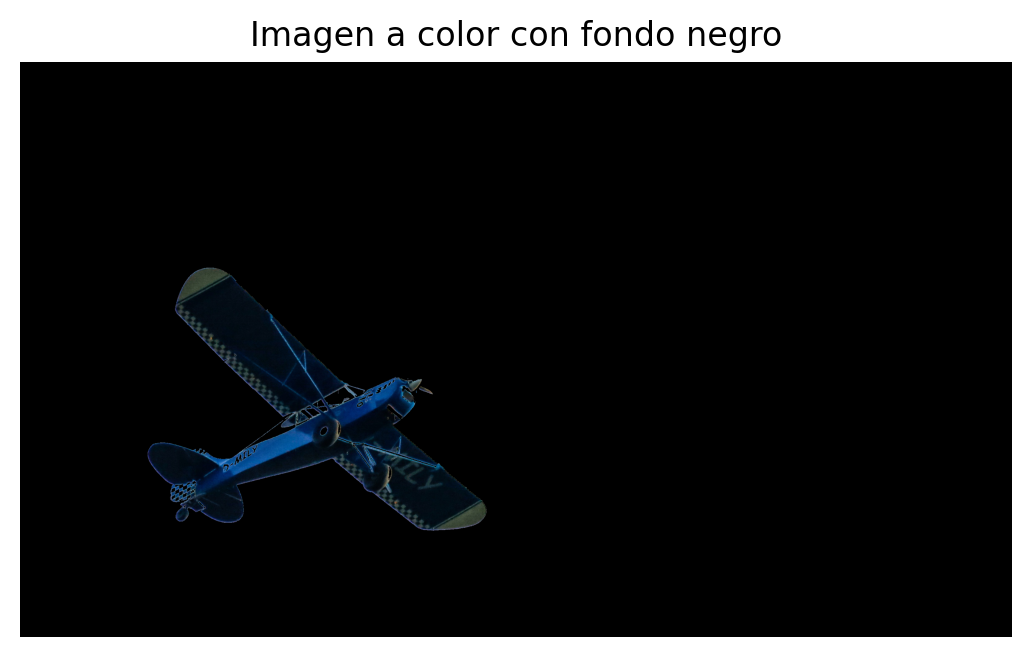

In [8]:
# Define img_color_masked
img_color_masked = cv2.bitwise_and(img_color,img_color,mask = img_bin)
print(f'Las dimensiones de la imagen son {img_color_masked.shape}')
print(f'La clase de la imagen es {type(img_color_masked).__name__}')
print(f'La clase de cada pixel es {img_color_masked.dtype}')

plt.imshow(img_color_masked)
plt.title('Imagen a color con fondo negro')
plt.axis('off');

## Espejar la imagen

El objetivo final de esta tarea es pegar un segundo avión en el lado derecho de la imagen original. Una opción sería mover el avión hacia la derecha, pero en este caso optaremos por espejar la imagen. Un ejemplo de esto se muestra a continuación:

![Ejemplo de imagen](ejemplo.png)

Una lista de Python o arreglo unidimensional de Numpy se puede invertir así: ```my_array[::-1]```. En este caso queremos invertir un arreglo tridimensional, por lo que el proceso será un poco distinto. También podemos espejar la imagen con funciones de Numpy.

**Tip:** puedes buscar "Numpy mirror image" en Google para ver cómo espejar la imagen.

**Guarda la imagen ```img_color_masked``` espejada en la variable ```img_color_masked_mirrored```.**

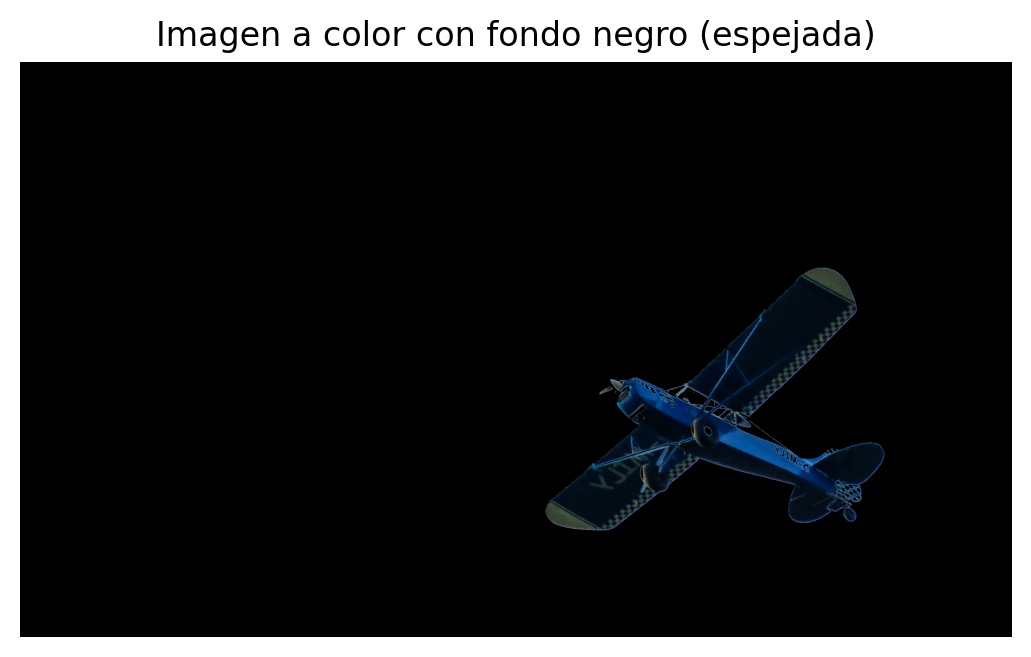

In [9]:
# Define img_color_masked_mirrored
img_color_masked_mirrored = np.flip(img_color_masked, axis = 1)
plt.imshow(img_color_masked_mirrored)
plt.title('Imagen a color con fondo negro (espejada)')
plt.axis('off');

## Sobreponer el avión en la imagen original

### Primer intento

Tenemos nuestro avión segmentado y en la ubicación correcta, así que ahora debemos colocarlo sobre la imagen original. En clases vimos que podemos hacer una suma ponderada entre dos imagenes, como sigue:

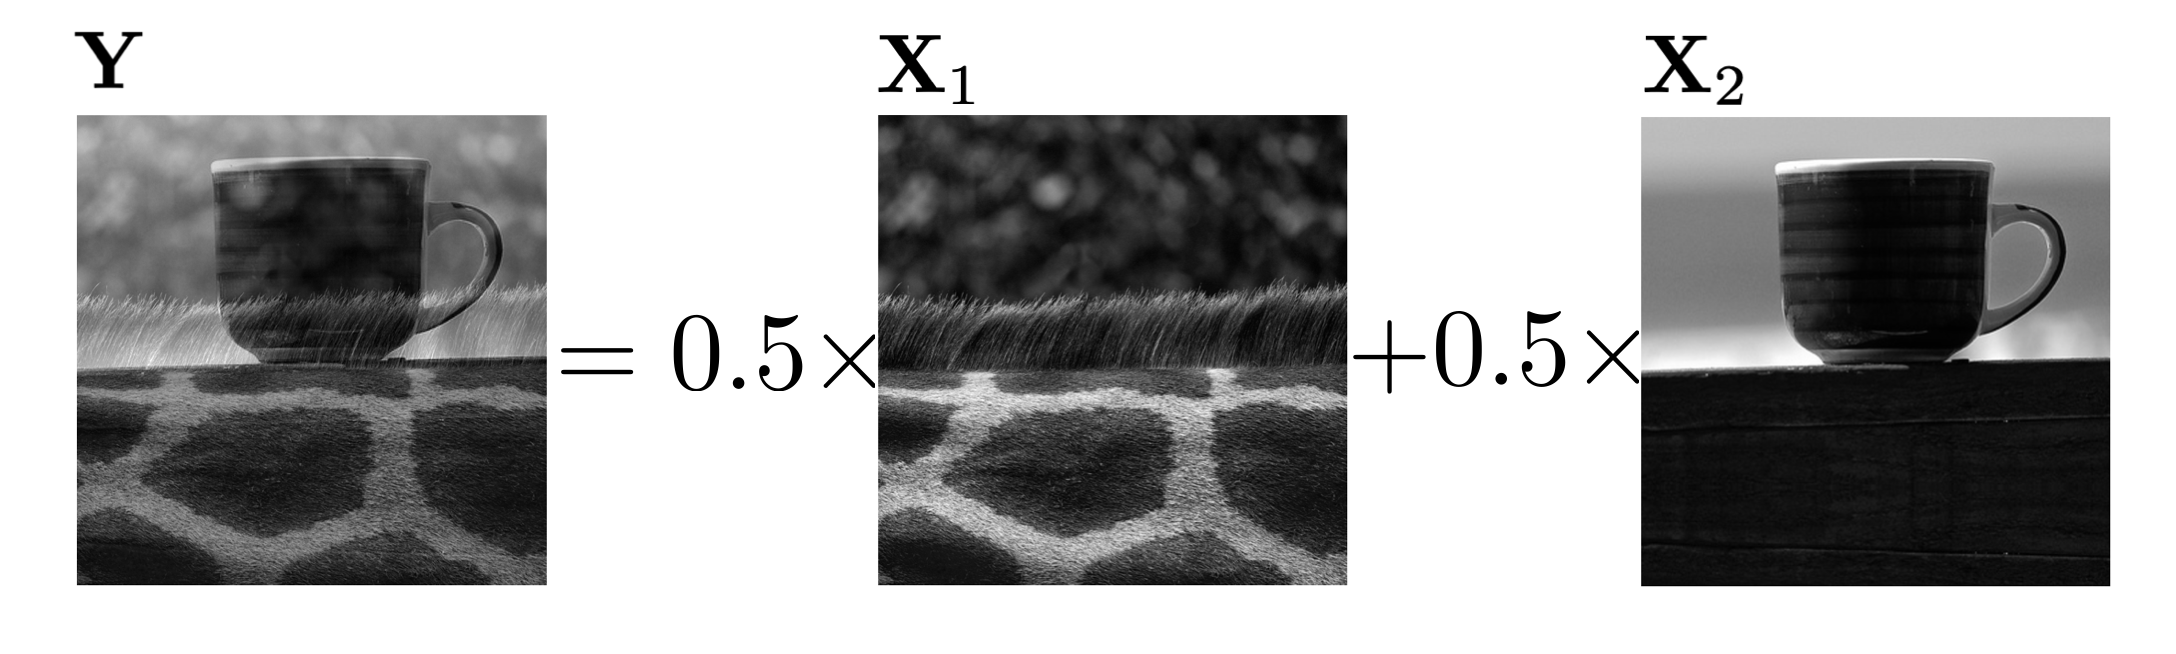

Veamos qué pasa si hacemos eso entre nuestra imagen original y la modificada. Las ponderaremos con la función ```addWeighted``` de OpenCV. ¿Funcionará?

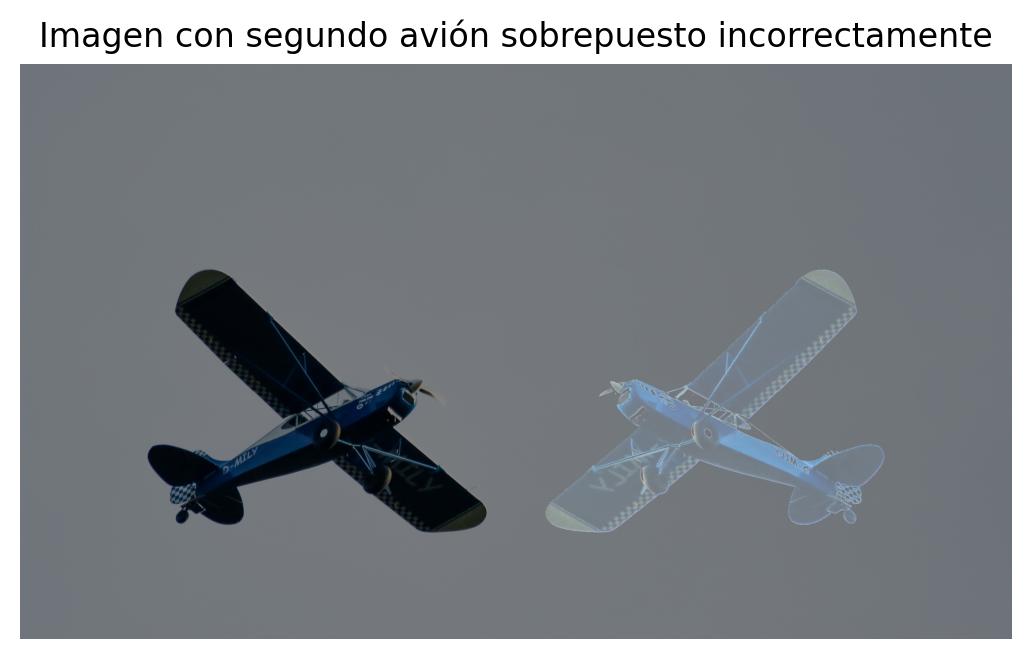

In [10]:
img_planes_incorrect = cv2.addWeighted(img_color, 0.5, img_color_masked_mirrored, 0.5, 0)

plt.title('Imagen con segundo avión sobrepuesto incorrectamente')
plt.imshow(img_planes_incorrect)
plt.axis('off');

El resultado es claramente deficiente. El color del nuevo avión no es el deseado y todo el resto de la imagen está más oscura.

### Segundo intento

Vimos que gran parte de la imagen se oscureció dado que fue ponderada por 0.5. ¿Qué pasara si sumamos ambas imágenes sin ponderarlas?

Usemos la función ```add``` de OpenCV. ¿Qué crees que ocurrirá?

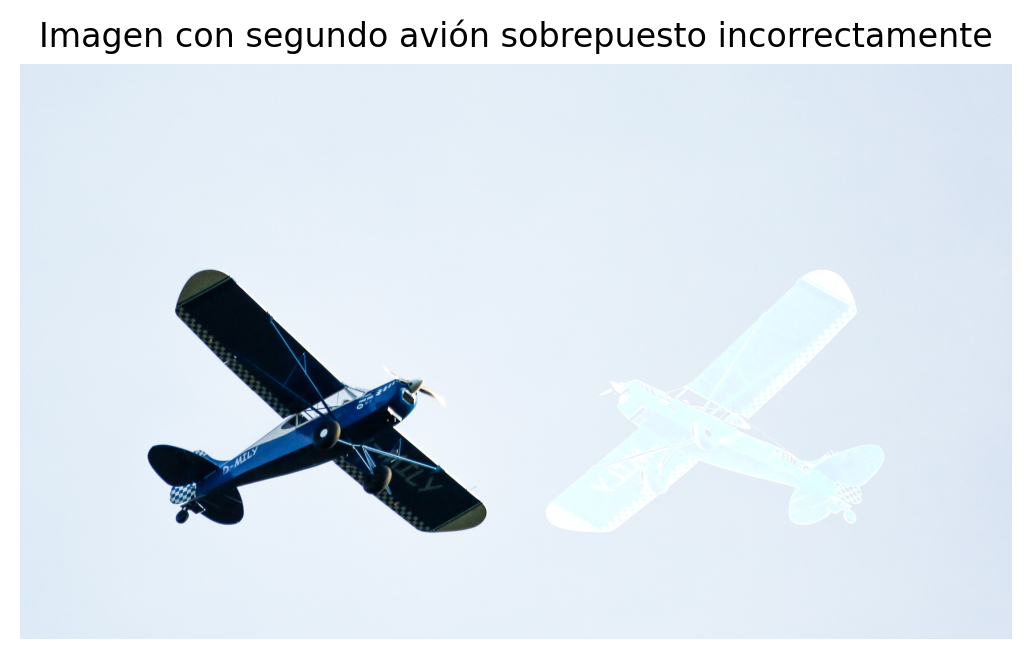

In [11]:
img_planes_incorrect_2 = cv2.add(img_color, img_color_masked_mirrored)

plt.title('Imagen con segundo avión sobrepuesto incorrectamente')
plt.imshow(img_planes_incorrect_2)
plt.axis('off');

El avión original y su fondo se ven correctamente. Sin embargo, el nuevo avión no se ve como debería. Esto ocurre porque sumamos los pixeles del avión a los pixeles del cielo, obteniendo pixeles más claros que lo esperado. 

## Sobreponer el avión en la imagen original correctamente

### Espejar la máscara binaria

Nos dimos cuenta que no funcionó sumar las imágenes, incluso ponderándolas previamente. El segundo intento estuvo cerca, pero nos faltó un paso: fijar en cero los pixeles donde estará el nuevo avión. De esta manera, al nuevo avión no se le sumarán los pixeles del cielo.

Previamente definimos una imagen binaria con el avión segmentado: ```img_bin```. Podemos usarla para cumplir el objetivo mencionado en el párrafo anterior. **Comencemos espejándola horizontalmente y guardándola en ```img_bin_mirrored```**. Debes notar que como esta imagen no es a color, es bidimensional y no tridimensional como ```img_color_masked```.

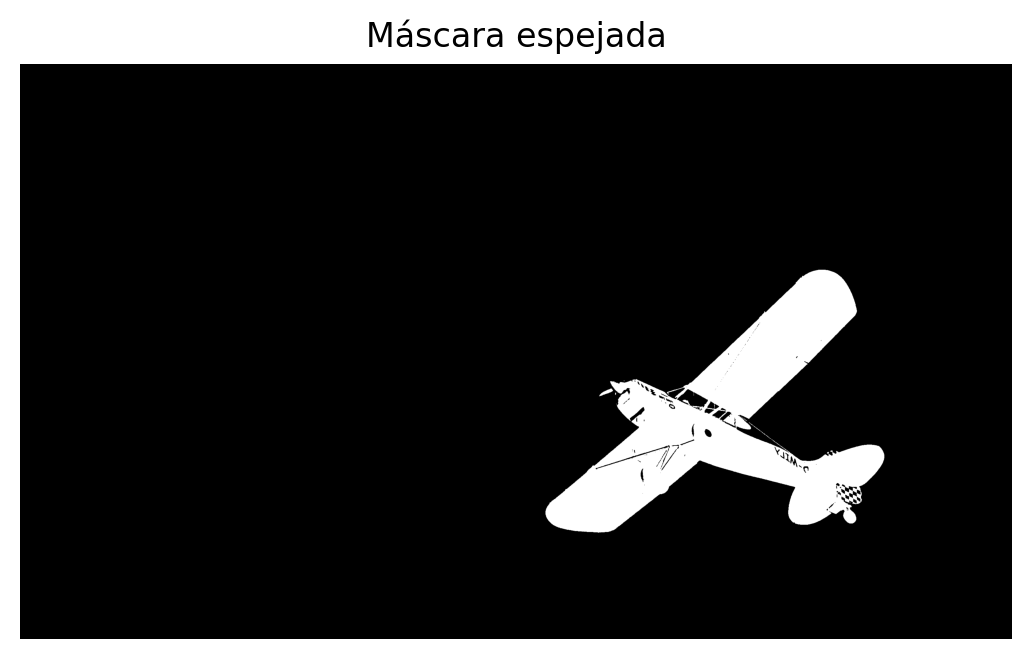

In [12]:
# Define img_bin_mirrored
img_bin_mirrored = np.flip(img_bin, axis = 1)
plt.imshow(img_bin_mirrored, cmap='gray')
plt.title('Máscara espejada')
plt.axis('off');

### Invertir la máscara binaria

Los pixeles blancos de la máscara ```img_bin_mirrored``` corresponden al avión, ya que antes queríamos conservar solo esa parte de la imagen. Ahora queremos hacer lo contrario, eliminar los pixeles que corresponden al avión.

**Invierte la máscara ```img_bin_mirrored``` y guárdala en la variable ```img_bin_mirrored_inverted```.** El ejemplo al final de [esta página](https://docs.opencv.org/4.5.2/d0/d86/tutorial_py_image_arithmetics.html) contiene una función de OpenCV que te puede ayudar.

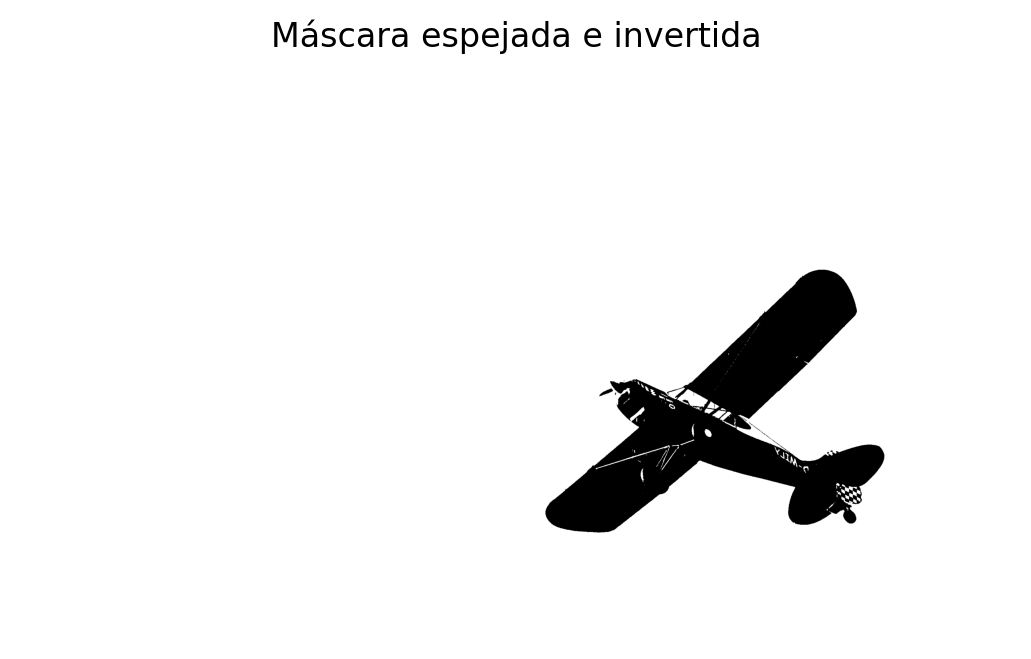

In [13]:
# Define img_bin_mirrored_inverted
img_bin_mirrored_inverted = cv2.bitwise_not(img_bin_mirrored)
plt.imshow(img_bin_mirrored_inverted, cmap='gray')
plt.title('Máscara espejada e invertida')
plt.axis('off');

### Aplicar la máscara a la imagen original

El siguiente paso corresponde a aplicar la nueva máscara a la imagen original, dejando en negro los pixeles donde se ubicará el segundo avión.

Este es el mismo procedimiento que hicimos para eliminar el fondo unos pasos atrás. **Aplica la máscara ```img_bin_mirrored_inverted``` a ```img_color``` y guárdala en la variable ```img_color_masked_2```.**

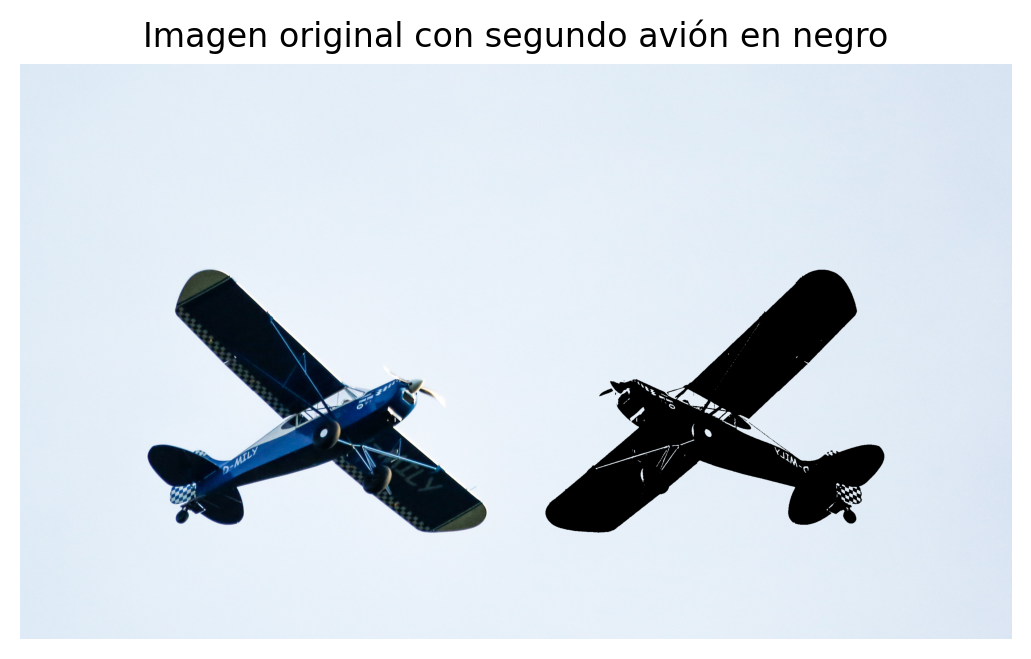

In [14]:
# Define img_color_masked_2
img_color_masked_2 = cv2.bitwise_and(img_color, img_color, mask = img_bin_mirrored_inverted)
plt.imshow(img_color_masked_2)
plt.title('Imagen original con segundo avión en negro')
plt.axis('off');

### Sumar las dos imágenes

¡Último paso! Ahora que fijamos en cero los pixeles donde se ubicará nuestro avión, podemos sumarlo sin problema.

**Suma la última imagen que acabamos de obtener con ```img_color_masked_mirrored``` y guárdala en ```img_planes```.**

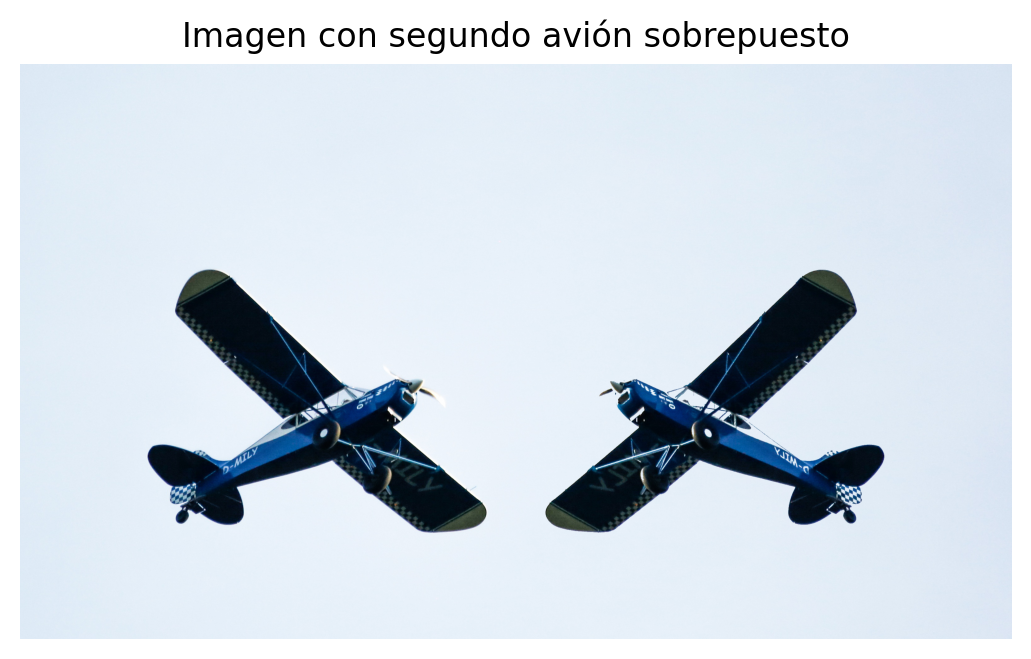

In [15]:
# Define img_planes
img_planes = cv2.add(img_color_masked_2, img_color_masked_mirrored)
plt.title('Imagen con segundo avión sobrepuesto')
plt.imshow(img_planes)
plt.axis('off');